In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# Create a function to calculate ECDF given a column series
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) / n

    return x, y  

In [3]:
df = pd.read_csv('Sheffield.csv')

In [4]:
df.tail()

,yyyy,mm,tmax,tmin,af,rain,sun
1597,2016,2,7.8,2,5,68.6,96.1
1598,2016,3,9.1,2.9,2,87.2,98.6
1599,2016,4,11.6,3.8,1,65.8,154.9
1600,2016,5,16.9,7.9,0,58.2,164.5
1601,2016,6,18.8,11.1,0,130.4,106.5


In [5]:
mod = df.query('yyyy > 2000 and yyyy < 2015 and rain < 200')

In [6]:
rainfall = mod.rain

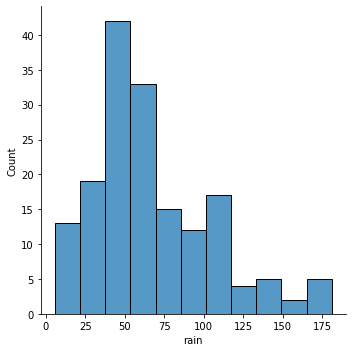

In [7]:
sns.displot(rainfall)

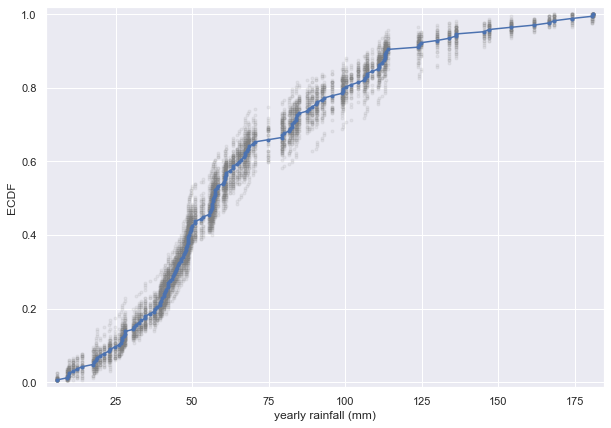

In [8]:
sns.set()
fig, ax = plt.subplots(figsize=(10,7))

for i in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

## Create a Bootstrap replicate function

In [9]:
# Bootstrap replicate function
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data"""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [10]:
bs_replicates = np.empty(10000)
for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(rainfall, np.mean)

Text(0, 0.5, 'ECDF')

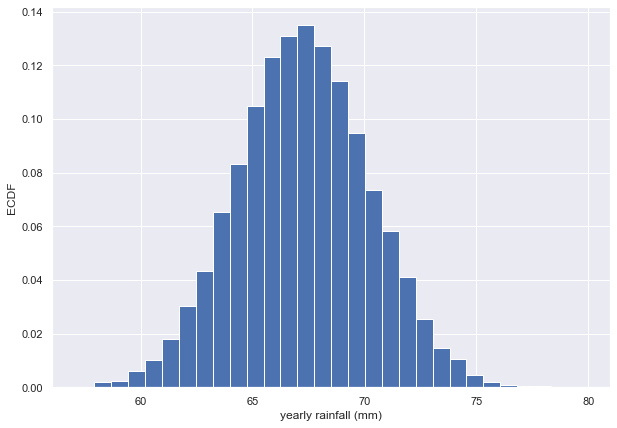

In [11]:
# Plot out the histogram
fig, ax = plt.subplots(figsize=(10,7))
plt.hist(bs_replicates, bins=30, density=True)
plt.xlabel('yearly rainfall (mm)')
plt.ylabel('ECDF')

In [12]:
# Calculate the 95% confidence interval for the rainfall data
conf_int = np.percentile(bs_replicates, [2.5,97.5])
conf_int

array([61.56214072, 73.10131737])

## Create a function that generates many bootstrap replicates from a 1D array

In [17]:
def draw_bs_reps(data, func, size=1):
    """ Draw bootstrap replicates."""
    
    # Initialize array of replicates bs_replicates
    bs_replicates = np.empty(size)
    
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
        
    return bs_replicates

### Use bootstrap replicates to determine mean of Sheffield annual rainfall

In [18]:
# Use the new function to generate 10,000 bootstrap replicates and compare the SEM of the actual data to the generated Std()
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, size=10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

2.95111124189256
2.9787008642338595


Text(0, 0.5, 'PDF')

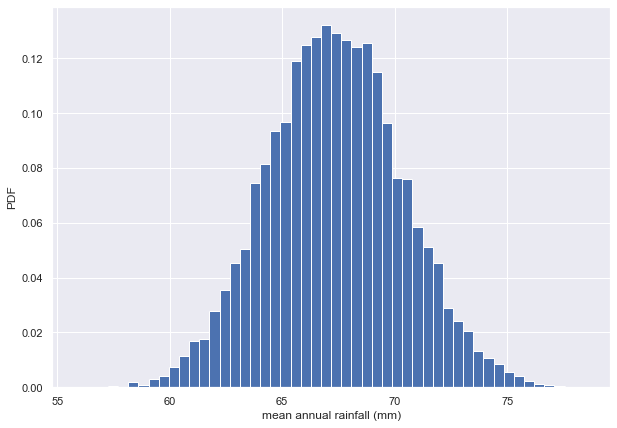

In [20]:
# Make a histogram of the results
fig, ax = plt.subplots(figsize=(10,7))
plt.hist(bs_replicates, bins=50, density=True)
plt.xlabel('mean annual rainfall (mm)')
plt.ylabel('PDF')

### Use bootstrap replicates to determine variance of Sheffield annual rainfall

In [24]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, size=10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates / 100

Text(0, 0.5, 'PDF')

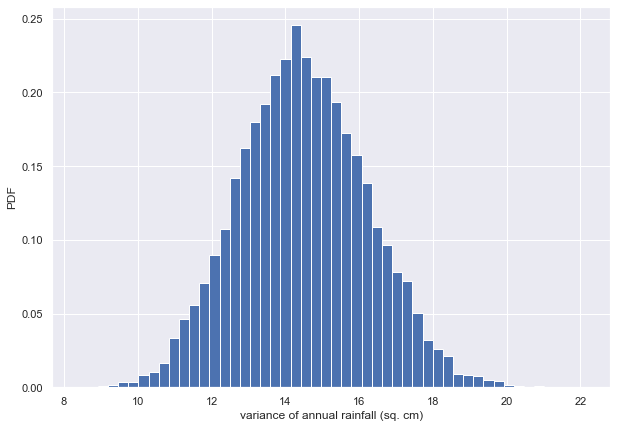

In [27]:
# Make a histogram of the results
fig, ax = plt.subplots(figsize=(10,7))
plt.hist(bs_replicates, bins=50, density=True)
plt.xlabel('variance of annual rainfall (sq. cm)')
plt.ylabel('PDF')

This has a tail on the right hand side so it is not normally distributed

In [30]:
# Compute a 95% confidence interval
var_ci = np.percentile(bs_replicates, [2.5,97.5])
var_ci

array([11.22629127, 17.94471786])